<a href="https://colab.research.google.com/github/aniketAnvekar/Breast-Cancer-Classification/blob/main/BreastCancerClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from glob import glob

In [2]:
import pandas as pd
import numpy as np
import os
import random
import matplotlib.pylab as plt

In [3]:
my_paths = []

for name in glob('/content/drive/MyDrive/Breast_Cancer_Classification/data/dataset/*', recursive=True):
  my_paths.append(name)

In [4]:
len(my_paths)

79

In [5]:
total_imaages = []
my_paths = my_paths[:35]
for i in my_paths:
  total_imaages += glob(i+'/*/*.png', recursive=True)

len(total_imaages)

44786

In [ ]:
total_imaages[:5]

['/content/drive/MyDrive/Breast_Cancer_Classification/data/dataset/10253/0/10253_idx5_x1001_y1001_class0.png',
 '/content/drive/MyDrive/Breast_Cancer_Classification/data/dataset/10253/0/10253_idx5_x1101_y451_class0.png',
 '/content/drive/MyDrive/Breast_Cancer_Classification/data/dataset/10253/0/10253_idx5_x1001_y1051_class0.png',
 '/content/drive/MyDrive/Breast_Cancer_Classification/data/dataset/10253/0/10253_idx5_x1001_y351_class0.png',
 '/content/drive/MyDrive/Breast_Cancer_Classification/data/dataset/10253/0/10253_idx5_x1151_y401_class0.png']

In [6]:
images = total_imaages[:35000]

images[:5]

['/content/drive/MyDrive/Breast_Cancer_Classification/data/dataset/10253/0/10253_idx5_x1001_y1001_class0.png',
 '/content/drive/MyDrive/Breast_Cancer_Classification/data/dataset/10253/0/10253_idx5_x1101_y451_class0.png',
 '/content/drive/MyDrive/Breast_Cancer_Classification/data/dataset/10253/0/10253_idx5_x1001_y1051_class0.png',
 '/content/drive/MyDrive/Breast_Cancer_Classification/data/dataset/10253/0/10253_idx5_x1001_y351_class0.png',
 '/content/drive/MyDrive/Breast_Cancer_Classification/data/dataset/10253/0/10253_idx5_x1151_y401_class0.png']

In [7]:
len(images)

35000

In [8]:
class0 = [] # 0 = no cancer
class1 = [] # 1 = cancer

for filename in images:
    if filename.endswith("class0.png"):
         class0.append(filename)
    else:
        class1.append(filename)

In [9]:
f"Class1 has {len(class1)} images"

'Class1 has 7452 images'

In [10]:
f"Class0 has {len(class0)} images"

'Class0 has 27548 images'

In [11]:
sampled_class0 = random.sample(class0, len(class1))
sampled_class1 = random.sample(class1, len(class1))
len(sampled_class0)

7452

In [12]:
from matplotlib.image import imread
import cv2

In [13]:
img = sampled_class0[0]

img = cv2.imread(img,cv2.IMREAD_COLOR)
img.shape

(50, 50, 3)

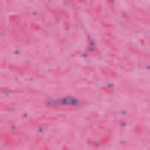

In [14]:
from google.colab.patches import cv2_imshow
img_sized = cv2.resize(img, (50, 50), interpolation=cv2.INTER_LINEAR)
resz_img = cv2.resize(img_sized,(150,150))
cv2_imshow(resz_img)

In [15]:
def get_img_arrays(data, label):
    img_arrays = []
    for i in data:
      if i.endswith('.png'):
        img = cv2.imread(i ,cv2.IMREAD_COLOR)
        img_sized = cv2.resize(img, (50, 50), interpolation=cv2.INTER_LINEAR)
        img_re=img_sized/255.0
        img_arrays.append([img_re, label])
    return img_arrays

In [16]:
class0_array = get_img_arrays(sampled_class0, 0)

In [17]:
class1_array = get_img_arrays(sampled_class1, 1)

In [18]:
print(len(class0_array))
print(len(class1_array))

7452
7452


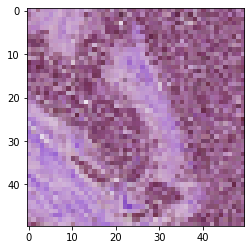

In [19]:
plt.imshow(class1_array[10][0])

In [ ]:
class0_array_np = np.asarray(class0_array)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
class0_array_np[1]

array([array([[[0.78431373, 0.64313725, 0.89411765],
        [0.78431373, 0.67058824, 0.89411765],
        [0.74901961, 0.62745098, 0.84313725],
        ...,
        [0.8       , 0.69411765, 0.90980392],
        [0.75686275, 0.61568627, 0.81960784],
        [0.76470588, 0.63137255, 0.89019608]],

       [[0.79215686, 0.68627451, 0.89019608],
        [0.79215686, 0.68627451, 0.90980392],
        [0.82745098, 0.7254902 , 0.91764706],
        ...,
        [0.81176471, 0.72941176, 0.91764706],
        [0.79607843, 0.69411765, 0.89803922],
        [0.8       , 0.69803922, 0.90196078]],

       [[0.77254902, 0.65490196, 0.88627451],
        [0.74901961, 0.61568627, 0.89803922],
        [0.69019608, 0.5372549 , 0.89411765],
        ...,
        [0.81568627, 0.72156863, 0.90196078],
        [0.81568627, 0.73333333, 0.90980392],
        [0.85490196, 0.77254902, 0.91764706]],

       ...,

       [[0.95686275, 0.95294118, 0.94117647],
        [0.94117647, 0.92941176, 0.95294118],
        [0.9450

In [ ]:
np.savetxt('/content/drive/MyDrive/Breast_Cancer_Classification/data/class0_array.txt',class0_array)

In [20]:
combined_data = np.concatenate((class0_array, class1_array))

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [21]:
combined_data.shape

(14904, 2)

In [22]:
np.save('/content/drive/MyDrive/Breast_Cancer_Classification/data/combined_arr.npz',combined_data)

In [24]:
a = np.load('/content/drive/MyDrive/Breast_Cancer_Classification/data/combined_arr.npz.npy',allow_pickle=True)
a.shape

(14904, 2)

In [25]:
X = []
y = []

for features,label in a:
    X.append(features)
    y.append(label)

In [26]:
len(X)

14904

In [27]:
len(y)

14904

In [28]:
X = np.array(X).reshape(-1, 50, 50, 3)

In [29]:
X.shape

(14904, 50, 50, 3)

In [54]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(11178, 50, 50, 3) (3726, 50, 50, 3) (11178, 2) (3726, 2)


In [35]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=100, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=(50,50,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(2,2), strides=(2,2), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(2,2), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(9216,input_shape=(12544,), activation='relu'),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='sigmoid')
])

In [36]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.000001),
    loss='binary_crossentropy',
    metrics=['accuracy','Recall','Precision']
)

In [37]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 100)       2800      
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 100)      400       
 hNormalization)                                                 
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 100)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 256)       102656    
                                                                 
 batch_normalization_2 (Batc  (None, 12, 12, 256)      1024      
 hNormalization)                                                 
                                                      

In [38]:
history = model.fit(X_train,y_train, validation_data=(X_test, y_test),epochs=10) 

Epoch 1/10
350/350 [==============================] - 366s 1s/step - loss: 0.5941 - accuracy: 0.7158 - recall: 0.6886 - precision: 0.6904 - val_loss: 0.6571 - val_accuracy: 0.5829 - val_recall: 0.6184 - val_precision: 0.5744
Epoch 2/10
350/350 [==============================] - 362s 1s/step - loss: 0.4920 - accuracy: 0.7899 - recall: 0.7791 - precision: 0.7765 - val_loss: 0.4572 - val_accuracy: 0.8092 - val_recall: 0.8049 - val_precision: 0.8088
Epoch 3/10
350/350 [==============================] - 363s 1s/step - loss: 0.4672 - accuracy: 0.8042 - recall: 0.7949 - precision: 0.7925 - val_loss: 0.4195 - val_accuracy: 0.8170 - val_recall: 0.8140 - val_precision: 0.8180
Epoch 4/10
350/350 [==============================] - 364s 1s/step - loss: 0.4515 - accuracy: 0.8064 - recall: 0.7997 - precision: 0.8011 - val_loss: 0.4141 - val_accuracy: 0.8188 - val_recall: 0.8196 - val_precision: 0.8201
Epoch 5/10
350/350 [==============================] - 365s 1s/step - loss: 0.4346 - accuracy: 0.8152

In [39]:
predict = model.evaluate(X_test,y_test)

117/117 [==============================] - 20s 167ms/step - loss: 0.4007 - accuracy: 0.8266 - recall: 0.8245 - precision: 0.8285


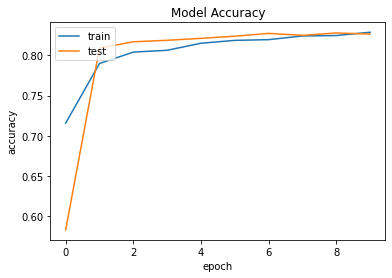

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

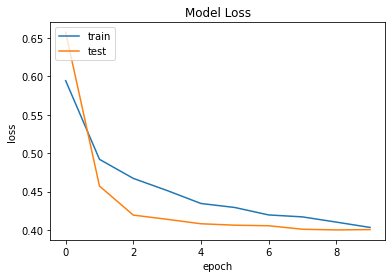

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [42]:
y_pred = model.predict(X_test)

In [43]:
Y_pred=[]
for i in y_pred:
    if i[0]>i[1]:
        Y_pred.append(0)
    else:
        Y_pred.append(1)

In [44]:
Y_test=[]
for i in y_test:
    if i[0]>i[1]:
        Y_test.append(0)
    else:
        Y_test.append(1)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(Y_test, Y_pred))
print('Classification Report')
print(classification_report(Y_test, Y_pred, target_names=['Negative','Positive']))

Confusion Matrix
[[1478  370]
 [ 276 1602]]
Classification Report
              precision    recall  f1-score   support

    Negative       0.84      0.80      0.82      1848
    Positive       0.81      0.85      0.83      1878

    accuracy                           0.83      3726
   macro avg       0.83      0.83      0.83      3726
weighted avg       0.83      0.83      0.83      3726



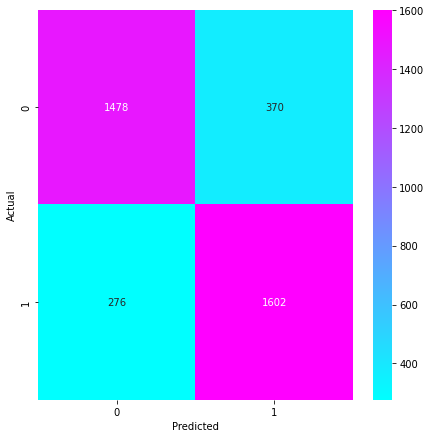

In [79]:
import seaborn as sns

figure = plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True,cmap=plt.cm.cool,fmt='d')
plt.tight_layout()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()